In [1]:
import torch
import matplotlib.pyplot as plt

In [3]:
device = 'cuda:0'


In [4]:
l = []
l_cache = []
for i in [10,50,100,250,300,350,400,450,500,600,700,800,900,1000]:
    try:
        a = torch.rand(i,i,i).type(torch.complex128).to(device)
        l.append(torch.cuda.memory_allocated()/1024**3)
        a = torch.fft.fftn(a)
        l_cache.append(torch.cuda.memory_cached()/1024**3)
        a = torch.fft.fftshift(a)
        a = torch.abs(a)**2
        del a
        torch.cuda.empty_cache() 
    except RuntimeError:
        del a
        torch.cuda.empty_cache() 

/home/slaskina/.conda/envs/fft/lib/python3.9/site-packages/torch/cuda/memory.py:391: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [6]:
l

[1.52587890625e-05,
 0.0018630027770996094,
 0.015625,
 0.23283100128173828,
 0.40234375,
 0.6388874053955078,
 0.95367431640625,
 1.3578686714172363,
 1.86328125,
 3.21875,
 5.111328125,
 7.62939453125,
 10.86328125,
 14.901161193847656]

In [7]:
import numpy as np
from scipy import interpolate
f = interpolate.interp1d([10,50,100,250,300,350,400,450,500,600,700,800,900,1000], l, fill_value = "extrapolate")
f_l = interpolate.interp1d([10,50,100,250,300,350,400,450,500,600], l_cache, fill_value = "extrapolate")

Text(0.5, 1.0, 'Memory usage for FT calculation')

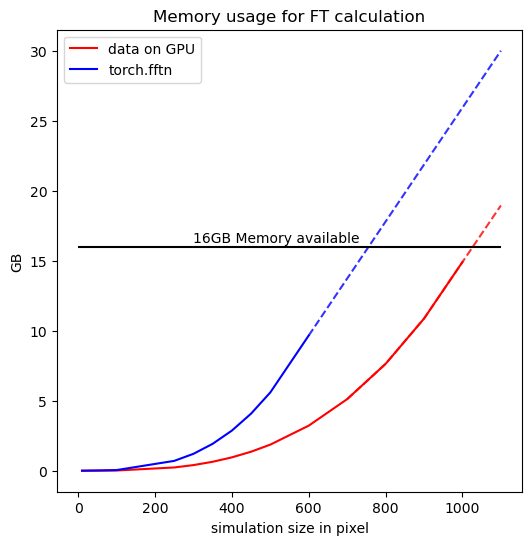

In [9]:

plt.figure(figsize=(6,6))
plt.plot( [10,50,100,250,300,350,400,450,500,600,700,800,900,1000], l, label = 'data on GPU', color = 'red')
plt.plot( [10,50,100,250,300,350,400,450,500,600,], l_cache, label = 'torch.fftn', color = 'blue')
plt.plot( [700,800,900,1000,1100], [f(i) for i in [700,800,900,1000,1100]], '--',color = 'red',alpha=0.8 )
plt.plot( [600,700,800,900,1000,1100], [f_l(i) for i in [600,700,800,900,1000,1100]], '--',color = 'blue',alpha=0.8 )
plt.hlines(16, xmin = 0, xmax = 1100, color = 'black')
plt.text(300,16.3, '16GB Memory available ')
plt.legend()
plt.xlabel('simulation size in pixel')
plt.ylabel('GB')
plt.title('Memory usage for FT calculation')


In [19]:
def ft_custom(data):
    FT = data.type(torch.complex128)
    try:
        for k in range(FT.shape[0]):
            if FT[k,:,:].any():
                FT_2D = FT[k,:,:].to(device)
                FT_2D = torch.fft.fft2(FT_2D, norm = 'forward')
                FT[k,:,:] = FT_2D.cpu()
                del FT_2D
        for i in range(FT.shape[1]):
            for j in range(FT.shape[2]):    
                    FT_1D = FT[:,i,j].to(device)
                    FT_1D = torch.fft.fft(FT_1D, norm = 'forward')
                    FT[:,i,j] = FT_1D.cpu()
                    del FT_1D
                    torch.cuda.empty_cache() 
            
        FT = torch.fft.fftshift(FT)
        FT = torch.abs(FT)**2
    except RuntimeError:
        del FT
        torch.cuda.empty_cache() 
    return  torch.cuda.memory_allocated()/1024**3,torch.cuda.memory_cached()/1024**3

In [20]:
l_slice = []
l_cache_slice = []
for i in [10,50,100,250,300,350,400,450,500,600,700,800,900,1000, 1100, 1200, 1300,1400,1500, 2000]:
    a = torch.rand(i,i,i)
    mem, cache = ft_custom(a)



/home/slaskina/.conda/envs/fft/lib/python3.9/site-packages/torch/cuda/memory.py:391: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


: 

: 